In [1]:
# Data used: the 2019 Index of Economic Freedom (ief) public data from https://www.heritage.org/index/ is used
# Here, new metrics with new criteria (features) is introduced for arriving at a score ranking the world countries
# Examining this new metrics is the motivation for this project based on the following reasoning:
    # In our days, new metrics are introduced to rank or explain different things and phenomena
        # It is not always clear that the new metrics and its results have any logic behind or make any sense
    # So, our goal is:
        # to examine the new metrics feature behavior
        # to determine if these features or part of them play a significant role in the overall score
        # to determine whether the overall score can be accurately predicted using these features
# We use Linear Regression model for our analysis
# If the answers from our investigation are positive, then we can take into consideration the new metrics and results
# If the answers are negative, then we should be discard this new metrics and the results presented

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = "whitegrid", font_scale = 1.5)

In [3]:
# Read ief data

data = pd.read_excel('index2019_data.xls')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    186 non-null    int64  
 1   Country Name                 186 non-null    object 
 2   WEBNAME                      186 non-null    object 
 3   Region                       186 non-null    object 
 4   World Rank                   180 non-null    float64
 5   Region Rank                  180 non-null    float64
 6   2019 Score                   180 non-null    float64
 7   Property Rights              185 non-null    float64
 8   Judical Effectiveness        185 non-null    float64
 9   Government Integrity         185 non-null    float64
 10  Tax Burden                   180 non-null    float64
 11  Gov't Spending               183 non-null    float64
 12  Fiscal Health                183 non-null    float64
 13  Business Freedom    

In [4]:
data.head(10)

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,69.6,2.505,2.9,1957.58,8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,36,3.900,2.5,12506.6,13.9,2.0,1119.1,71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,632.9,2.000,3.1,15237.2,10,5.6,1203.0,25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,190.3,0.700,2.9,6752.58,8.2,31.7,-2254.5,65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,920.2,2.900,0.7,20875.8,8.7,25.7,11857.0,52.6
5,6,Armenia,Armenia,Europe,47.0,24.0,67.7,57.2,46.3,38.6,...,Armenia,3,28.3,7.500,3.6,9455.94,18.2,0.9,245.7,53.5
6,7,Australia,Australia,Asia-Pacific,5.0,4.0,80.9,79.1,86.5,79.9,...,Australia,24.8,1246.5,2.300,2.4,50333.7,5.6,2.0,46368.0,41.6
7,8,Austria,Austria,Europe,31.0,16.0,72.0,84.2,71.3,77.4,...,Austria,8.8,439.6,2.900,1.3,49868.7,5.5,2.2,9629.6,78.8
8,9,Azerbaijan,Azerbaijan,Asia-Pacific,60.0,13.0,65.4,59.1,53.1,44.7,...,Azerbaijan,9.8,171.8,0.100,1.2,17492.4,5,13.0,2867.0,54.7
9,10,Bahamas,Bahamas,Americas,76.0,15.0,62.9,42.2,46.9,43.7,...,Bahamas,0.4,11.6,1.300,-0.7,31139.4,12.6,1.4,927.7,57.2


In [5]:
data.columns

Index(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', '2019 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of GDP ', 'Country',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

In [6]:
# One can see that the data comprises of:
    # a) well-known criteria such as 'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)', \
        # '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)','Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)', \
        # 'Public Debt (% of GDP)'
    # b) new criteria which determine the ief score
# Here, we focus on these new criteria and new ranking score

In [7]:
# Select the new features contributing to the overall ief score

data_ief = data[['Property Rights', 'Judical Effectiveness', 'Government Integrity', 'Tax Burden', "Gov't Spending",
              'Fiscal Health', 'Business Freedom', 'Labor Freedom', 'Monetary Freedom', 'Trade Freedom', 'Investment Freedom ', 
                 'Financial Freedom', '2019 Score']]
data_ief.head(5)

,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,2019 Score
0,19.6,29.6,25.2,91.7,80.3,99.3,49.2,60.4,76.7,66.0,10.0,10.0,51.5
1,54.8,30.6,40.4,86.3,73.9,80.6,69.3,52.7,81.5,87.8,70.0,70.0,66.5
2,31.6,36.2,28.9,76.4,48.7,18.7,61.6,49.9,74.9,67.4,30.0,30.0,46.2
3,35.9,26.6,20.5,83.9,80.7,58.2,55.7,58.8,55.4,61.2,30.0,40.0,50.6
4,47.8,44.5,33.5,69.3,49.5,33.0,56.4,46.9,60.2,70.0,55.0,60.0,52.2


In [8]:
# The target is '2019 Score' and the rest of the columns are the predictors (features)

In [9]:
# 1) EDA

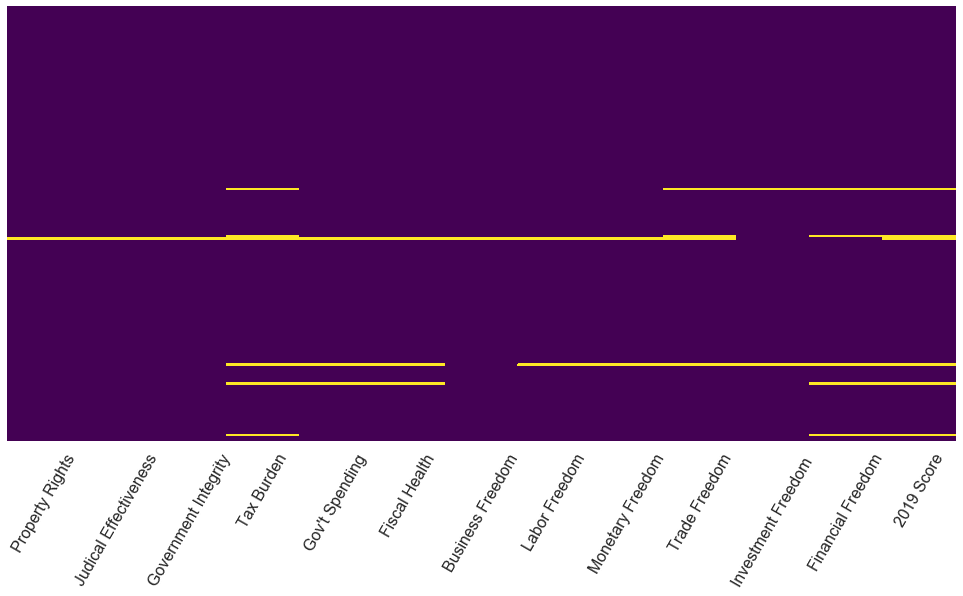

In [10]:
# Visualize missing data points
# Please, note that this visualization method works only with relatively small number of rows

plt.figure(figsize = (17, 8))
sns.heatmap(data_ief.isnull(), yticklabels = False,cbar = False, cmap ='viridis')
plt.tick_params(labelsize = 16, rotation = 60)

plt.show()

In [11]:
# The yellow bars in the plot represent missing data points

In [12]:
# Another way to find if there is missing data in different columns is by calling .info() on data -->
    # if the number of non-null entries is smaller than the total number of entries, then that feature has missing values

data_ief.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Property Rights        185 non-null    float64
 1   Judical Effectiveness  185 non-null    float64
 2   Government Integrity   185 non-null    float64
 3   Tax Burden             180 non-null    float64
 4   Gov't Spending         183 non-null    float64
 5   Fiscal Health          183 non-null    float64
 6   Business Freedom       185 non-null    float64
 7   Labor Freedom          184 non-null    float64
 8   Monetary Freedom       184 non-null    float64
 9   Trade Freedom          182 non-null    float64
 10  Investment Freedom     184 non-null    float64
 11  Financial Freedom      181 non-null    float64
 12  2019 Score             180 non-null    float64
dtypes: float64(13)
memory usage: 19.0 KB


In [13]:
# Maximum number of missing data is in the target column '2019 Score' - six missing points out of 186
# All other missing points are in the rows with missing target data points - see missing data map above
# Since we cannot work without a target value dropping the few missing data points is justified

In [14]:
# Drop nulls

data_c = data_ief.dropna().reset_index(drop = True)

# Always use .reset_index(drop=True) after dropna() or any time a raw is dropped to avoid index mix up between different cols!!!

data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Property Rights        180 non-null    float64
 1   Judical Effectiveness  180 non-null    float64
 2   Government Integrity   180 non-null    float64
 3   Tax Burden             180 non-null    float64
 4   Gov't Spending         180 non-null    float64
 5   Fiscal Health          180 non-null    float64
 6   Business Freedom       180 non-null    float64
 7   Labor Freedom          180 non-null    float64
 8   Monetary Freedom       180 non-null    float64
 9   Trade Freedom          180 non-null    float64
 10  Investment Freedom     180 non-null    float64
 11  Financial Freedom      180 non-null    float64
 12  2019 Score             180 non-null    float64
dtypes: float64(13)
memory usage: 18.4 KB


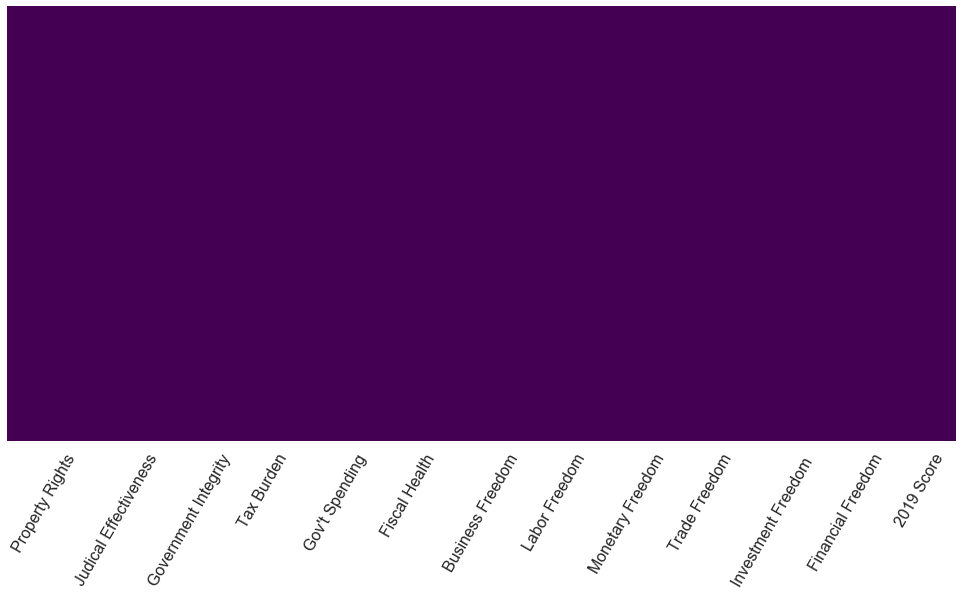

In [15]:
# All missing data points are gone, but still do a visual check --> solid color heatmap indicates no nulls

plt.figure(figsize = (17, 8))
sns.heatmap(data_c.isnull(),yticklabels=False,cbar=False,cmap ='viridis')
plt.tick_params(labelsize = 16, rotation = 60)

plt.show()

In [16]:
# Excellent - no missing data!

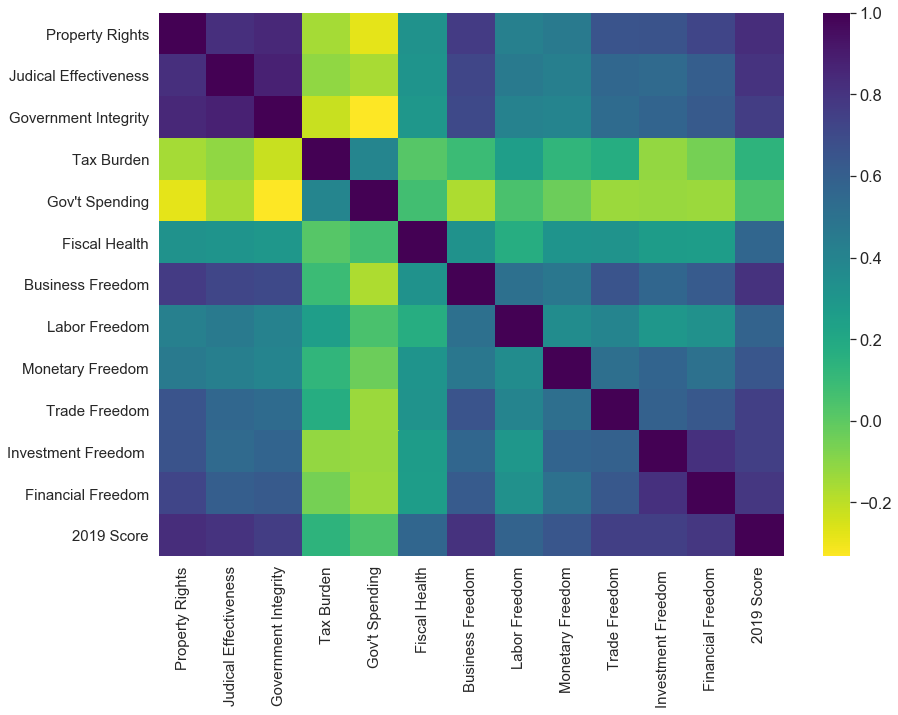

In [17]:
# Plot correlation matrix to examine for highly-correlated features

plt.figure(figsize = (14, 10))
sns.heatmap(data_c.corr(), cmap = 'viridis_r')
plt.tick_params(labelsize = 15)
plt.show()

In [18]:
# The correlation matrix shows: 
    # high degree of correlation between 'Property Rights', 'Judicial Effectiveness' and 'Government Integrity' -->
        # keep only 'Property Rights'
    # high degree of correlation between 'Investment Freedom' and 'Financial Freedom' -->
        # keep only 'Investment Freedom'
# Keeping only one of several highly-correlated features eliminates the possibility of having a degenerate matrix --> 
    # degenerate matrix creates a problem for the linear regression algorithm when solving for the coefficients of each feature 

In [19]:
# Print columns to have them handy for the code that follows
data_c.columns

Index(['Property Rights', 'Judical Effectiveness', 'Government Integrity',
       'Tax Burden', 'Gov't Spending', 'Fiscal Health', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom',
       'Investment Freedom ', 'Financial Freedom', '2019 Score'],
      dtype='object')

In [20]:
# Selecting only the uncorrelated features

data_c = data_c[['Property Rights', 'Tax Burden', "Gov't Spending", 'Fiscal Health', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom', 'Investment Freedom ', '2019 Score']]
data_c.head(5)

,Property Rights,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,2019 Score
0,19.6,91.7,80.3,99.3,49.2,60.4,76.7,66.0,10.0,51.5
1,54.8,86.3,73.9,80.6,69.3,52.7,81.5,87.8,70.0,66.5
2,31.6,76.4,48.7,18.7,61.6,49.9,74.9,67.4,30.0,46.2
3,35.9,83.9,80.7,58.2,55.7,58.8,55.4,61.2,30.0,50.6
4,47.8,69.3,49.5,33.0,56.4,46.9,60.2,70.0,55.0,52.2


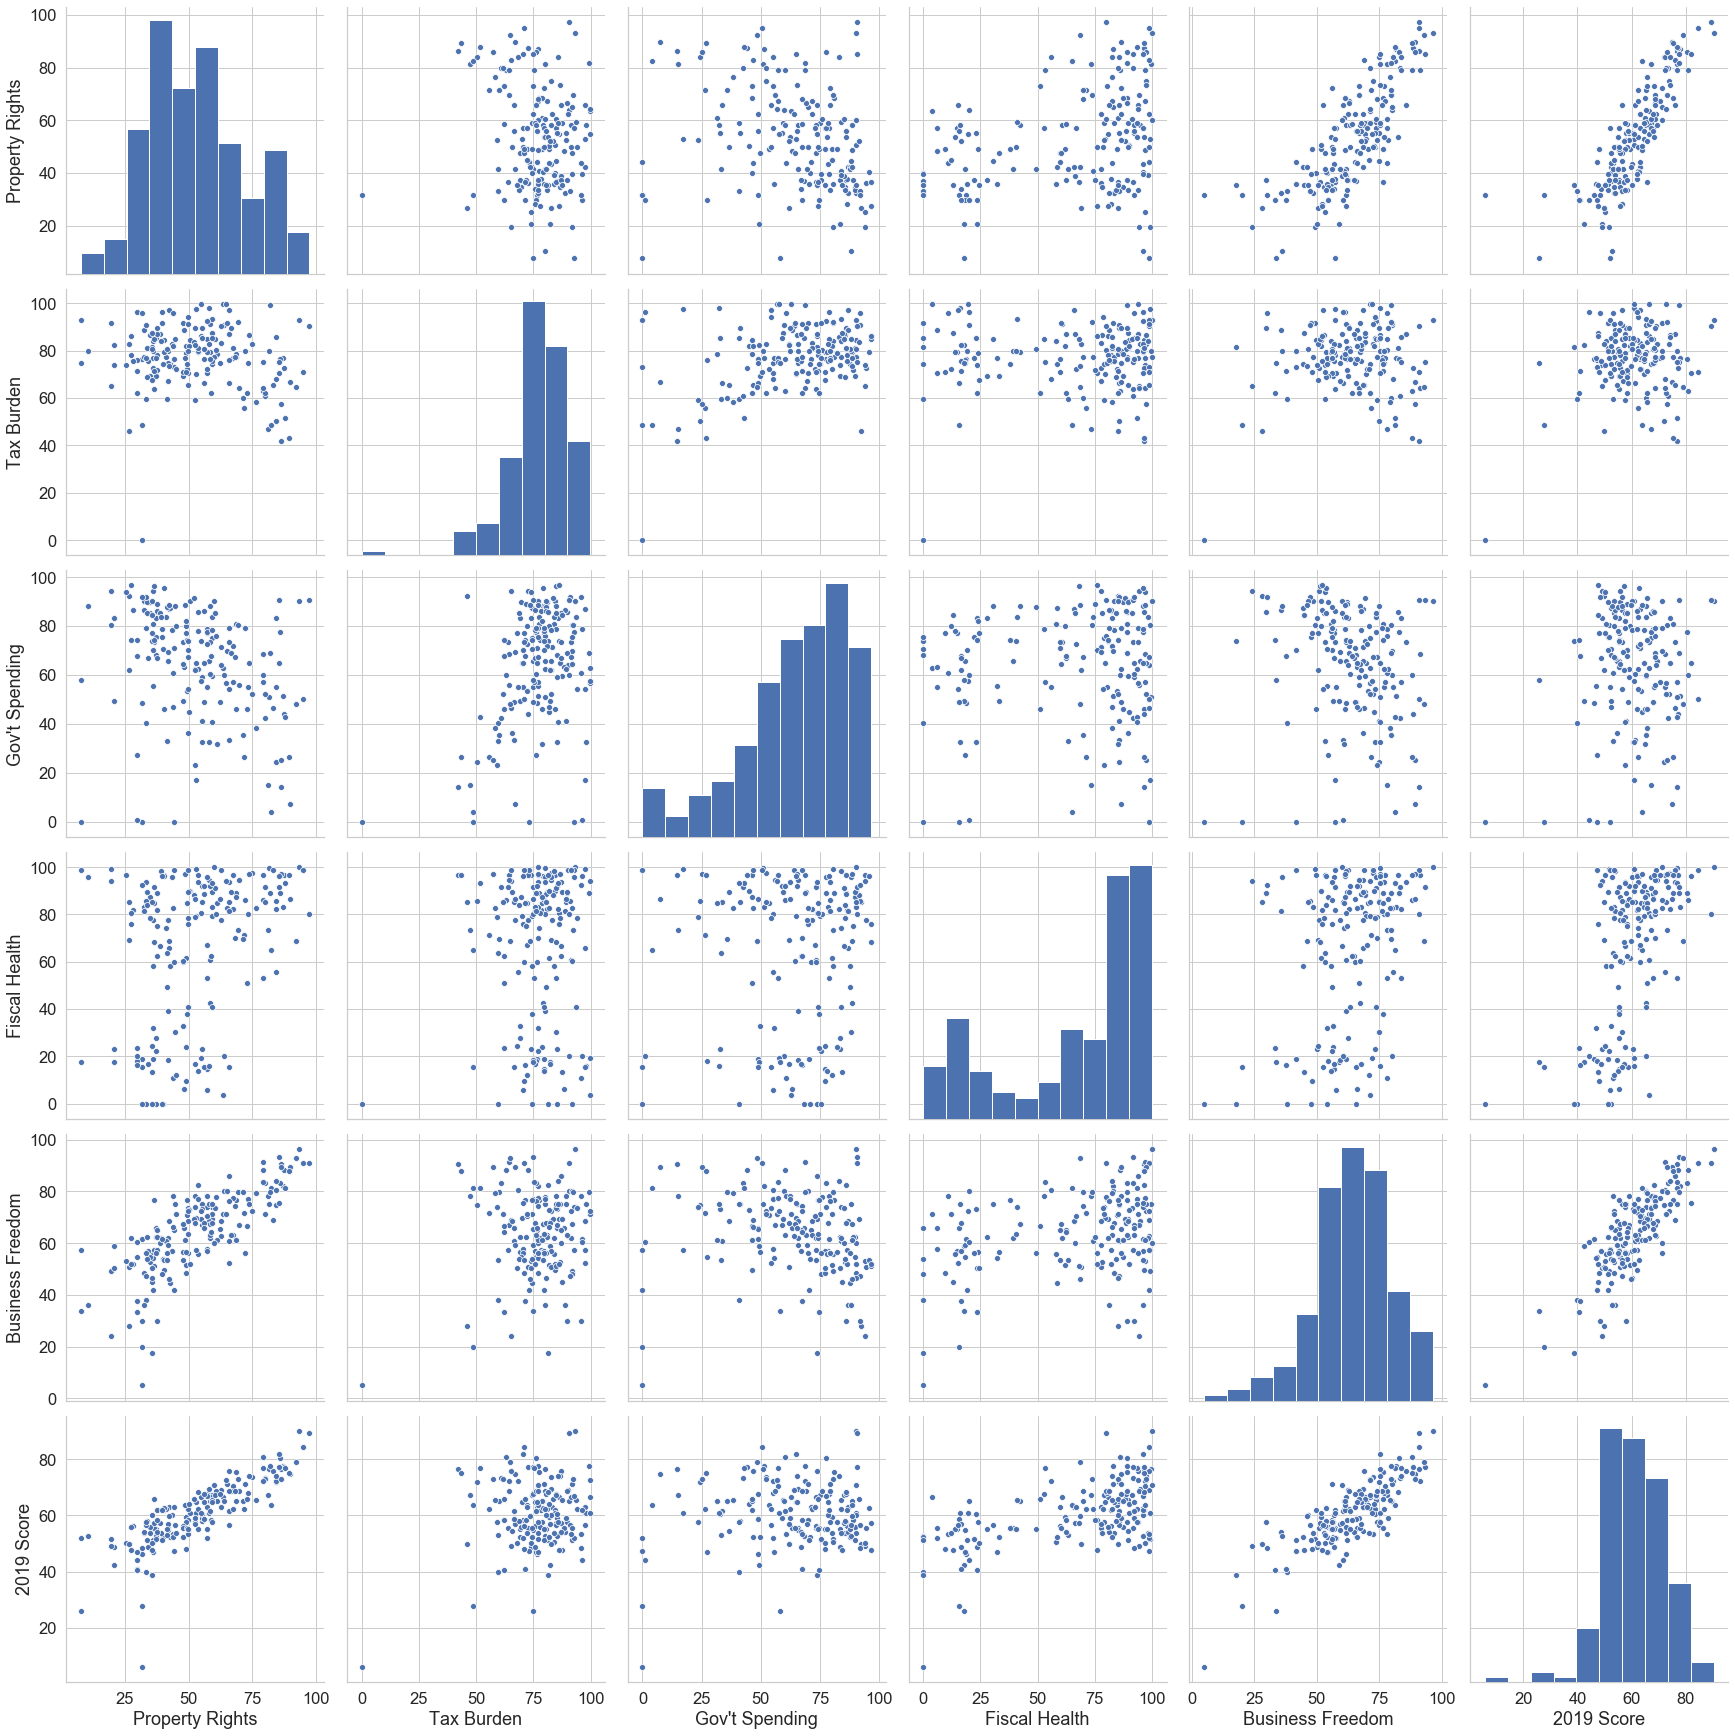

In [21]:
# Create pairplot with first half of data only for better readability; include target '2019 Score'

sns.pairplot(data_c.iloc[:, [0, 1, 2, 3, 4, 9]], height = 4, aspect = 1)
plt.tight_layout
plt.show()

In [22]:
# The plots do not show any abnormal feature behavior; no outliers are observed
# However, there are points with value of 0 in 'Tax Burden', 'Gov't Spending' and 'Fiscal Health'
# In addition, the scatter plots show:
    # clear relationship between 'Property Rights' and 'Business Freedom'
    # the same two features are also correlated to the target '2019 Score'; 'Fiscal Health' shows some degree of correlation
    # no evident relationship between the other features

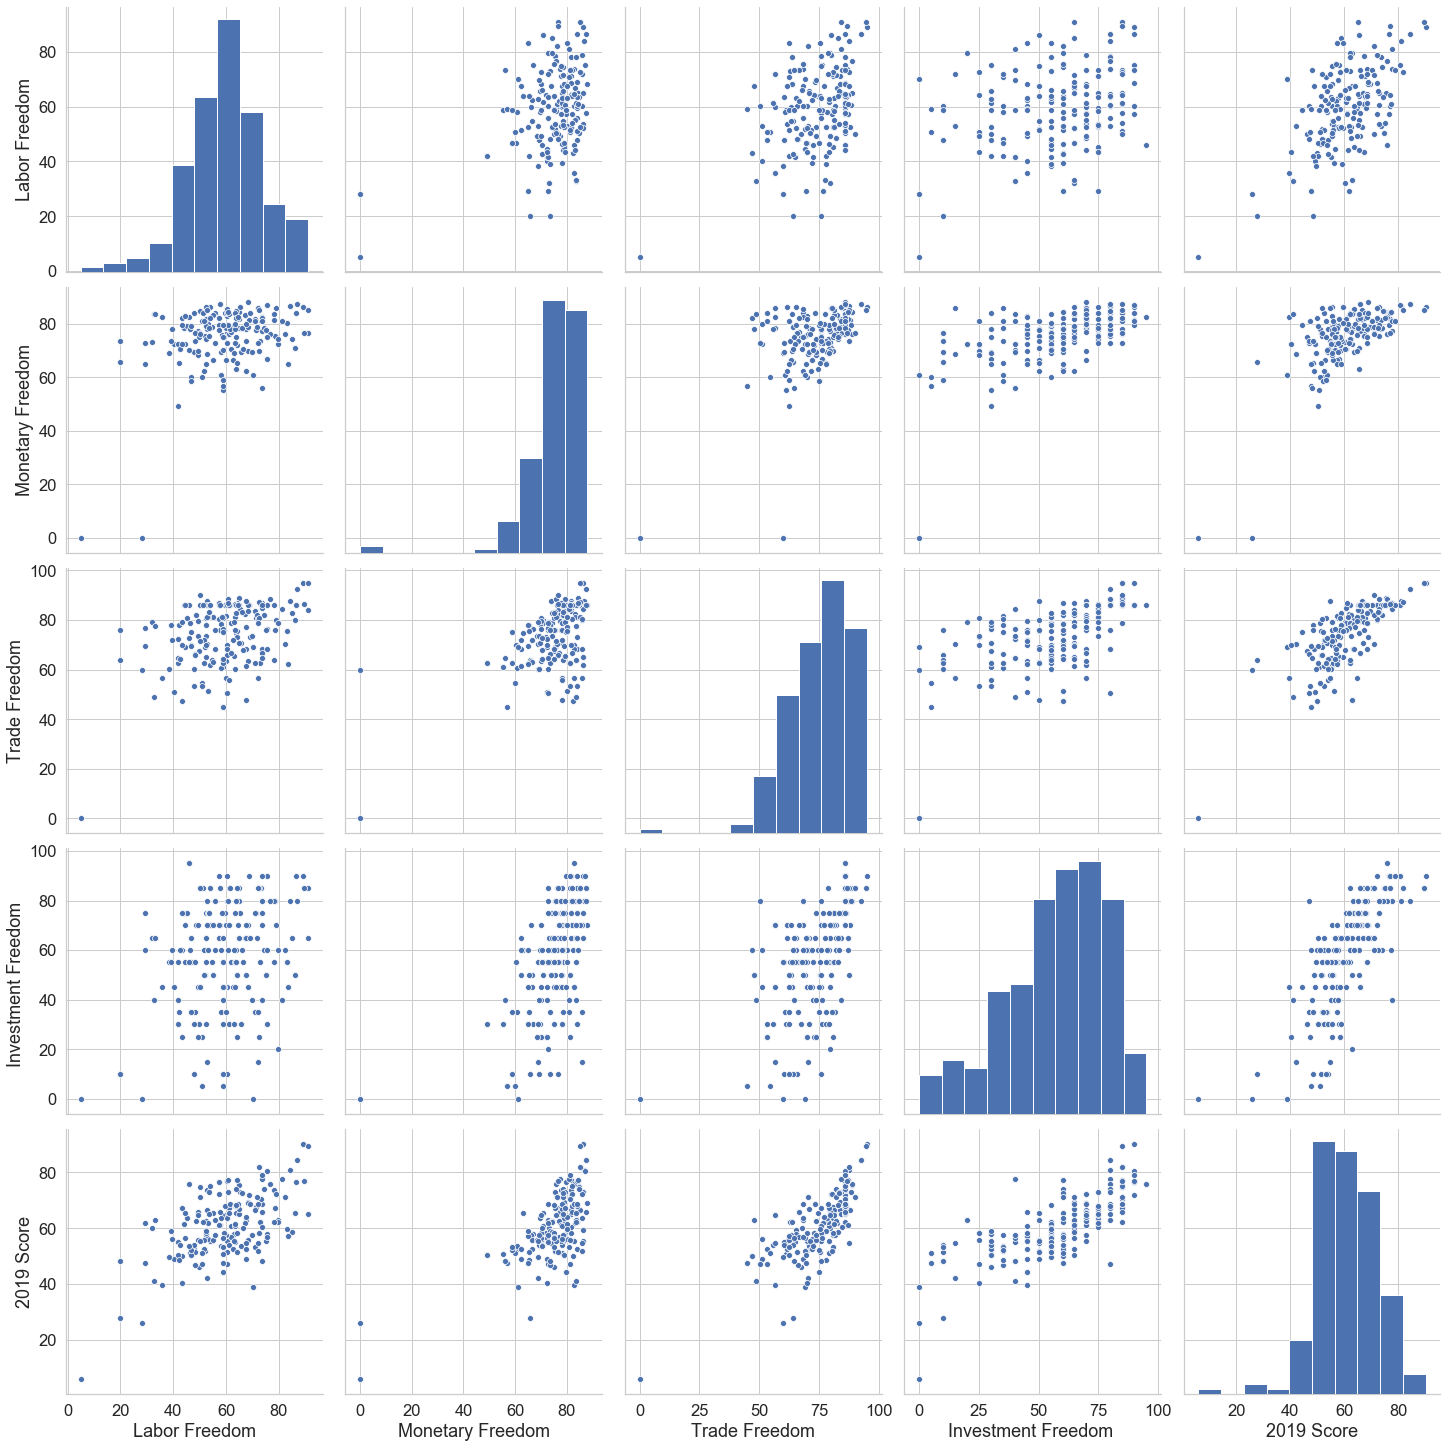

In [23]:
# Create pairplot with second half of data

sns.pairplot(data_c.iloc[:, 5:], height = 4, aspect = 1)
plt.tight_layout
plt.show()

In [24]:
# Similarly here, some data points in 'Monetary Freedom', 'Trade Freedom', and 'Financial Freedom' are 0
# It is very unlikely that these are real 0 scores given how far off the 0 points are from the rest of the data points
# The conclusion is that these 0s represent missing data and we need to replace them with something more appropriate
    # since there are no outliers, as a first order approximation we will use the corresponding mean values
# Regarding correlation, all plotted features appear correlated with the target '2019 Score' 

In [25]:
# Print columns to have them handy for the code that follows
data_c.columns

Index(['Property Rights', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', '2019 Score'],
      dtype='object')

In [26]:
# Define function for replacing the zero values

def replaceZeroValues(data):
    
    for col in ['Property Rights', 'Tax Burden', "Gov't Spending", 'Fiscal Health', 'Business Freedom', 
                'Labor Freedom', 'Monetary Freedom', 'Trade Freedom', 'Investment Freedom ', '2019 Score']:
        
        for i in range(len(data)):
            
            if data[col].iloc[i] == 0:
                
                print(col) # allows us to see which columns have data points = 0
                
                print(i) # and the row index for these data points
                
                data[col].iloc[i] = round((data[col].mean()), 1)
            
        else:
            
            data[col].iloc[i] = data[col].iloc[i]

In [27]:
# Replace data points = 0

replaceZeroValues(data_c)

Tax Burden
87
Gov't Spending
42
Gov't Spending
86
Gov't Spending
87
Gov't Spending
110
Fiscal Health
38
Fiscal Health
50
Fiscal Health
53
Fiscal Health
61
Fiscal Health
87
Fiscal Health
94
Monetary Freedom
87
Monetary Freedom
176
Trade Freedom
87
Investment Freedom 
53
Investment Freedom 
87
Investment Freedom 
176


In [28]:
# Quick check by creating the same pairplots again

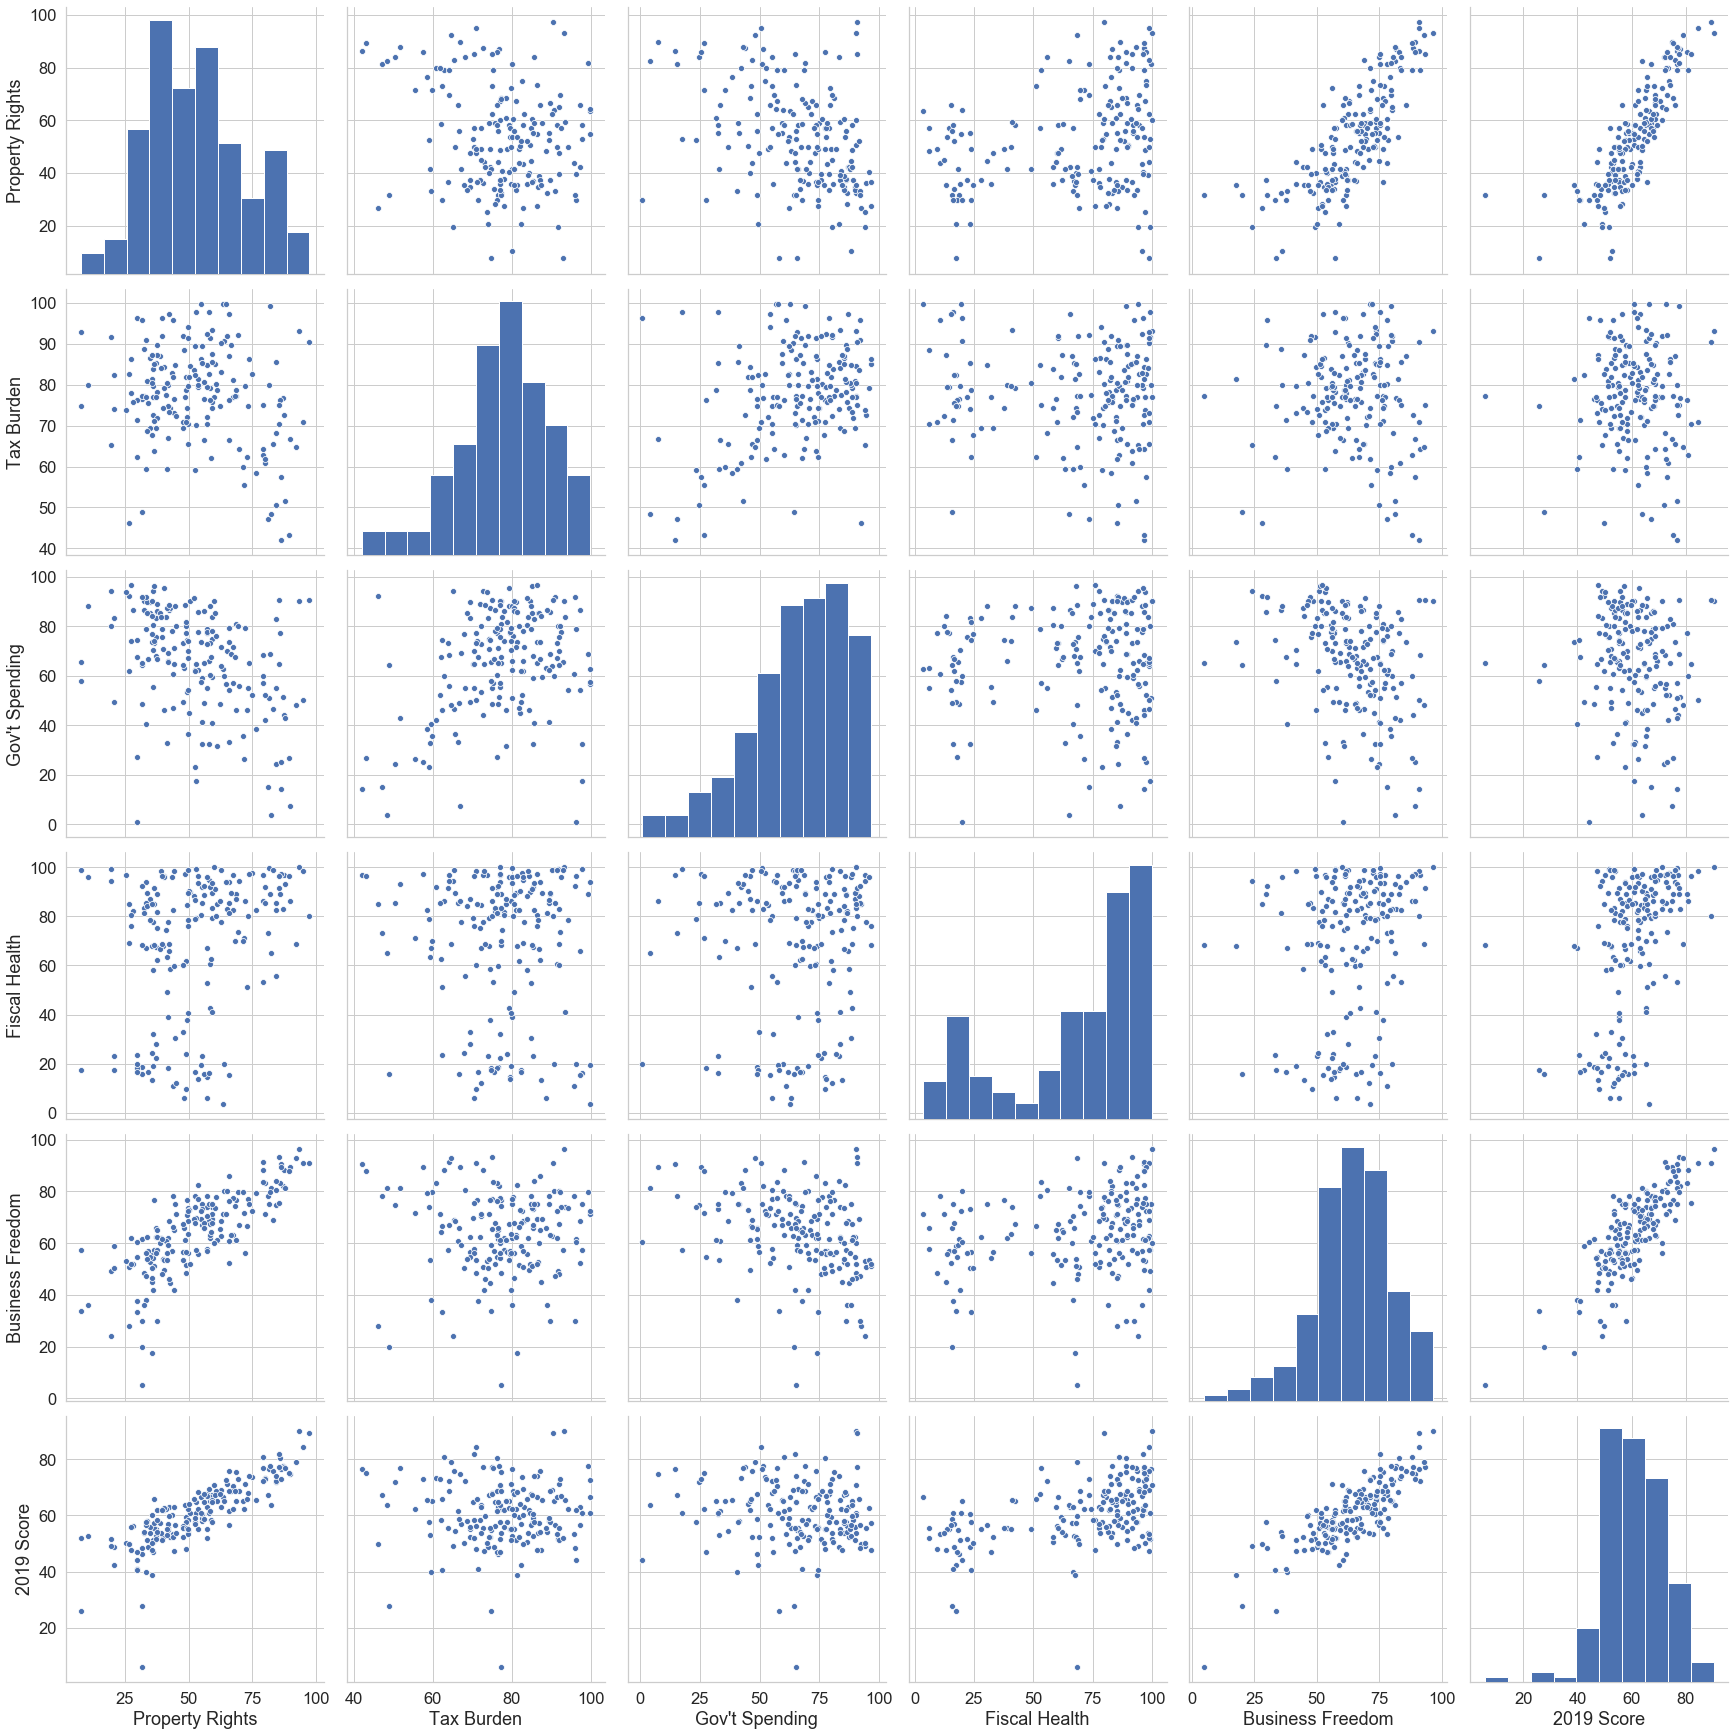

In [29]:
# First data half + target

sns.pairplot(data_c.iloc[:, [0, 1, 2, 3, 4, 9]], height = 4, aspect = 1)
plt.tight_layout
plt.show()

In [30]:
# 'Gov't Spending' has a point which is very close to 0 - let's quickly check its value

min(data_c["Gov't Spending"])

0.9

In [31]:
# This value is close to 0
# However, since we assumed that the missing data entries were writen as 0s, we assume that this is a true value

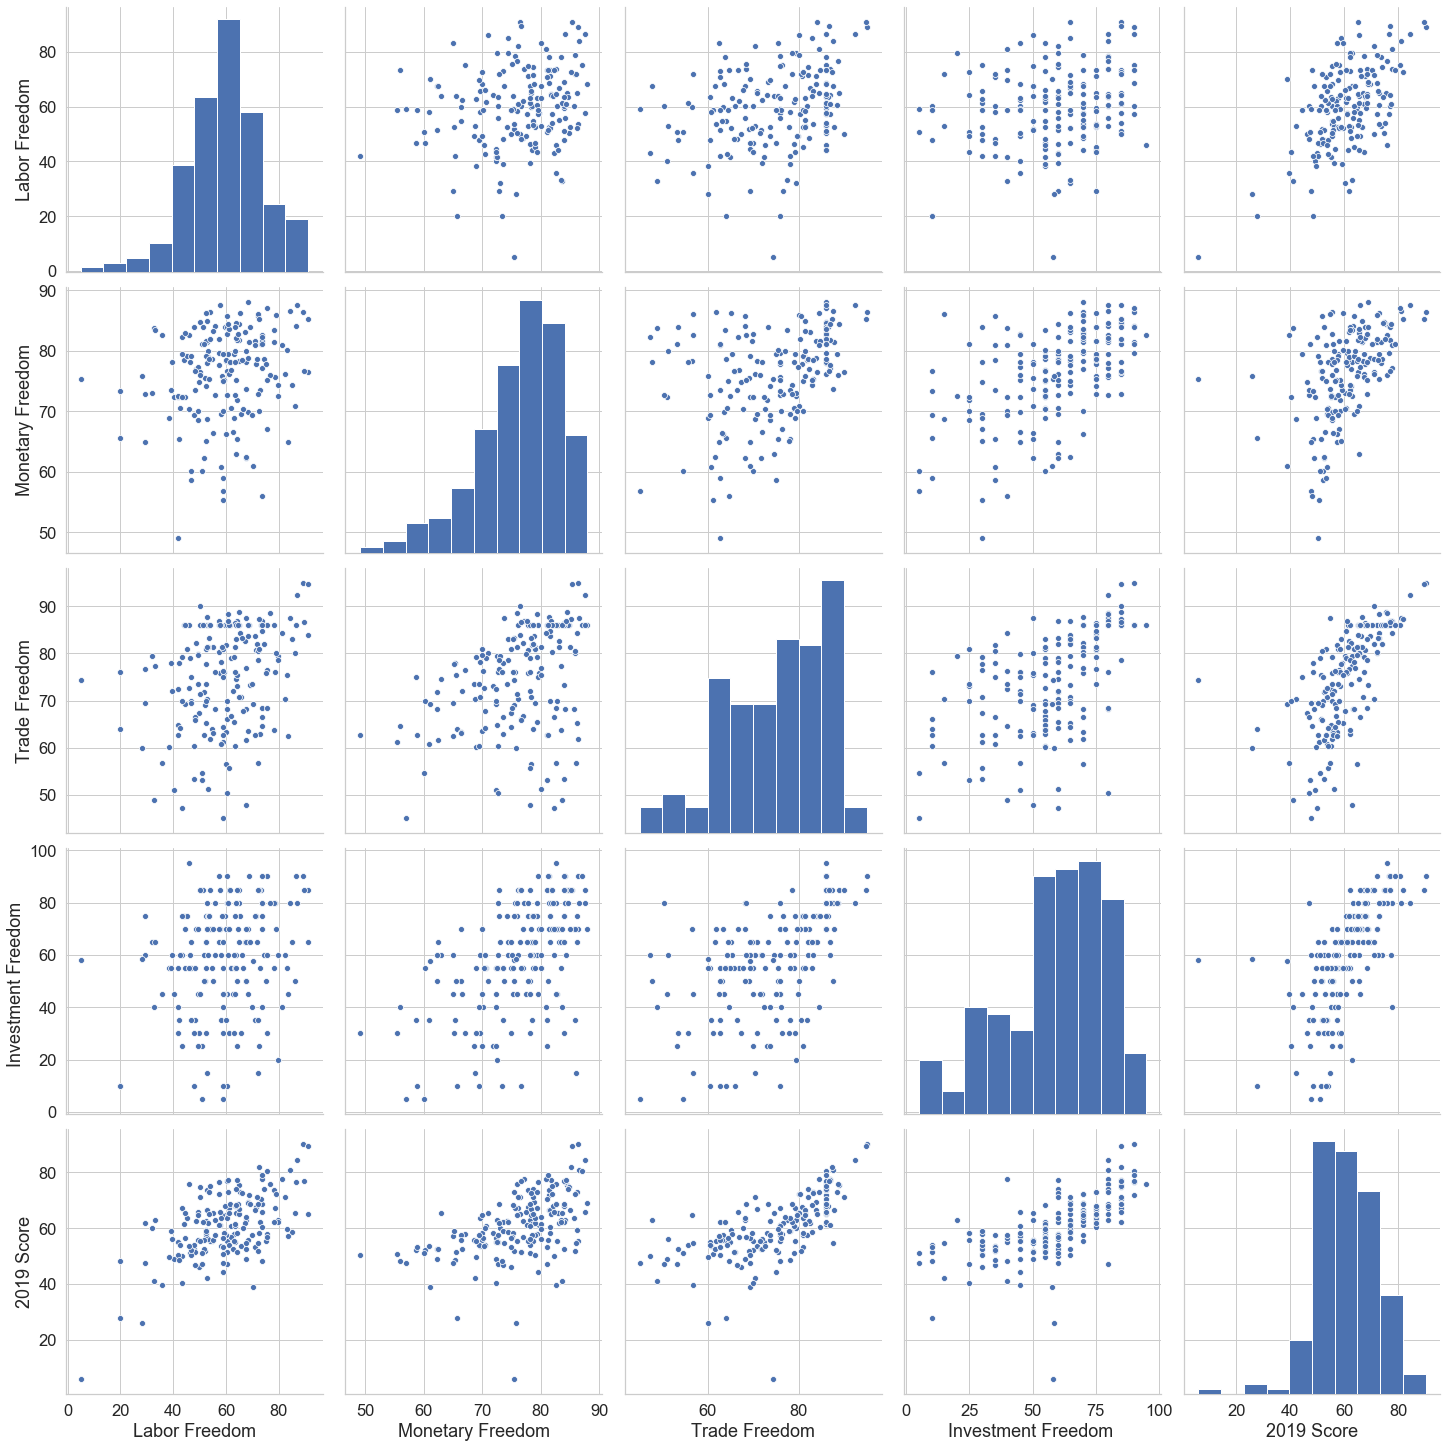

In [32]:
# Second data half

sns.pairplot(data_c.iloc[:, 5:], height = 4, aspect = 1)
plt.tight_layout
plt.show()

In [33]:
# Check the data point with a very small value in '2019 Score'
min(data_c.iloc[:, -1])

5.9

In [34]:
# Here too, we assume that this is a true data point

In [35]:
# 2) Create a model and use it with the data - in this project we will use Linear Regression

In [36]:
# Separate data into features, X, and target, y

X = data_c.iloc[:, :-1].values # features - all data columns, but last
y = data_c.iloc[:, -1].values # target - last data column

In [37]:
# Split data in train/test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
# Create Linear Regession model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Train model with training set
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# Make predictions using test set
y_pred_1 = regressor.predict(X_test) # indexing '_1' is used to be able to compare to results from another model

In [40]:
# Plot coefficients

coeff_data = pd.DataFrame(regressor.coef_, data_c.iloc[:, :-1].columns, columns=['Coefficient'])
coeff_data

,Coefficient
Property Rights,0.183020
Tax Burden,0.031414
Gov't Spending,0.111794
Fiscal Health,0.077224
Business Freedom,0.260371
Labor Freedom,0.139410
Monetary Freedom,0.126166
Trade Freedom,0.058219
Investment Freedom,0.104326


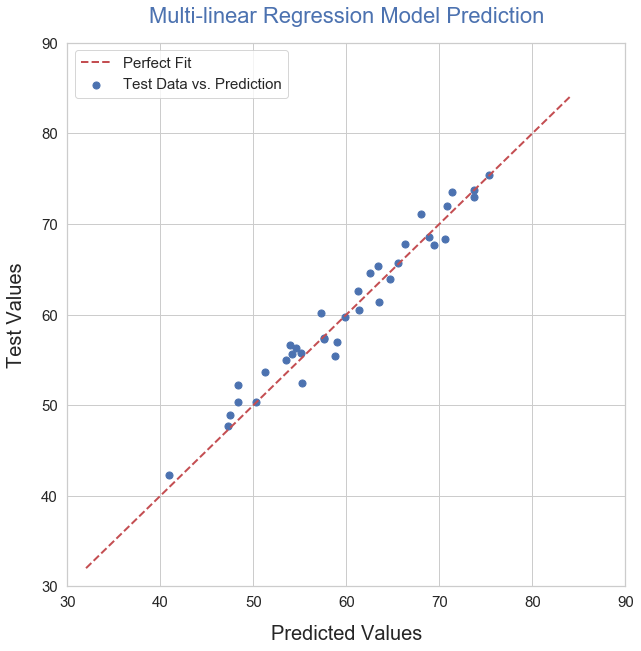

In [41]:
# Compare predictions to the test target, y_test

# Create data points for a straight line representing a perfect fit to the test data points 
y_line = np.arange(int(y_test.min()) - 10, int(y_test.max()) + 10)

# Set axes limits - adjust if necessary
x_min = 30
x_max = 90
d_x = 10

y_min = 30
y_max = 90
d_y = 10

plt.figure(figsize = (10, 10))
ax = plt.axes()

ax.set_xlim(x_min, x_max)
ax.set_xticks(np.arange(x_min, x_max + d_x, d_x))

ax.set_ylim(y_min, y_max)
ax.set_yticks(np.arange(y_min, y_max + d_y, d_y))

plt.scatter(y_pred_1, y_test, s = 50, c = 'b', label = 'Test Data vs. Prediction')
plt.plot(y_line, y_line, 'r--', lw = 2, label = 'Perfect Fit')
plt.xlabel('Predicted Values', fontsize = 20, labelpad = 15)
plt.ylabel('Test Values', fontsize = 20, labelpad = 15)
plt.title('Multi-linear Regression Model Prediction', fontsize = 22, c = 'b', pad = 20)
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

In [42]:
# Predictions are very close to the true target values, y_test
# The straight red dash line represents the ideal case when the prediction points are equal to the target values
# However, in reality we can never expect to have perfect fit
# In fact, we should be looking for something abnormal/wrong with the data, if we get a perfect fit from the model!

In [43]:
# 3) Model optimization

# Question: can we do (a little) better?
# Apply Backward Elimination using features p-value

In [44]:
# Because we will use statsmodels we need to add a column of ones to X to simulate the constant term in the regression

X = np.append(arr = np.ones((len(X), 1)).astype(int), values = X, axis = 1)
X

array([[ 1. , 19.6, 91.7, ..., 76.7, 66. , 10. ],
       [ 1. , 54.8, 86.3, ..., 81.5, 87.8, 70. ],
       [ 1. , 31.6, 76.4, ..., 74.9, 67.4, 30. ],
       ...,
       [ 1. , 49.8, 79.7, ..., 68.9, 79.2, 30. ],
       [ 1. , 45. , 72.3, ..., 70.3, 72.6, 55. ],
       [ 1. , 29.7, 62.3, ..., 72.4, 70. , 25. ]])

In [45]:
# First column now is ones and the rest of the columns are the features from X

In [46]:
# Set an array for the Backward Elimination

X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]] # we start with all features

In [47]:
# Create model from statsmodels.api

import statsmodels.api as sm

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() # using Ordinary Least Squares (OLS)
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 30 May 2020   Prob (F-statistic):           2.35e-88
Time:                        10:30:15   Log-Likelihood:                -463.36
No. Observations:                 180   AIC:                             946.7
Df Residuals:                     170   BIC:                             978.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.8642      3.639     -1.886      0.061     -14.048       0.320
x1             0.1880      0.025      7.428      0.000       0.138       0.238
x2             0.0318      0.024      1.338      0.183      -0.015       0.079
x3             0.1110      0.014      7.870      0.000       0.083       0.139
x4             0.0809      0.009      8.835      0.000       0.063       0.099
x5             0.2540      0.027      9.571      0.000       0.202       0.306
x6             0.1331      0.020      6.551      0.000       0.093       0.173
x7             0.0999      0.040      2.515      0.013       0.021       0.178
x8             0.0552      0.034      1.641      0.103      -0.011       0.121
x9             0.1079      0.017      6.326      0.000       0.074       0.142
==============================================================================
Omnibus:                      195.499   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8586.184
Skew:                          -3.988   Prob(JB):                         0.00
Kurtosis:                      35.882   Cond. No.                     3.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# Examine p-values from table; set significance threshold to 0.05 - everything above is non-significant
# The variable with largest p-value here is x2 with column index = 2; so, for the next step we will remove it from X_opt

In [49]:
X_opt = X[:, [0, 1, 3, 4, 5, 6, 7, 8, 9]] # remove colum with index = 2 and repeat

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     243.0
Date:                Sat, 30 May 2020   Prob (F-statistic):           3.54e-89
Time:                        10:30:15   Log-Likelihood:                -464.31
No. Observations:                 180   AIC:                             946.6
Df Residuals:                     171   BIC:                             975.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3714      3.472     -1.547      0.124     -12.225       1.482
x1             0.1807      0.025      7.294      0.000       0.132       0.230
x2             0.1167      0.013      8.661      0.000       0.090       0.143
x3             0.0800      0.009      8.742      0.000       0.062       0.098
x4             0.2589      0.026      9.831      0.000       0.207       0.311
x5             0.1380      0.020      6.893      0.000       0.098       0.178
x6             0.0985      0.040      2.474      0.014       0.020       0.177
x7             0.0652      0.033      1.984      0.049       0.000       0.130
x8             0.1044      0.017      6.180      0.000       0.071       0.138
==============================================================================
Omnibus:                      185.943   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7309.994
Skew:                          -3.710   Prob(JB):                         0.00
Kurtosis:                      33.325   Cond. No.                     2.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# Results show that the constant term (column of ones) has largest p --> remove it, as well

In [51]:
X_opt = X[:, [1, 3, 4, 5, 6, 7, 8, 9]] # remove colum with index = 0 and repeat

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              7927.
Date:                Sat, 30 May 2020   Prob (F-statistic):                   1.65e-216
Time:                        10:30:15   Log-Likelihood:                         -465.56
No. Observations:                 180   AIC:                                      947.1
Df Residuals:                     172   BIC:                                      972.7
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1905      0.024      7.922      0.000       0.143       0.238
x2             0.1085      0.012      8.721      0.000       0.084       0.133
x3             0.0807      0.009      8.791      0.000       0.063       0.099
x4             0.2543      0.026      9.679      0.000       0.202       0.306
x5             0.1345      0.020      6.733      0.000       0.095       0.174
x6             0.0535      0.027      1.961      0.052      -0.000       0.107
x7             0.0411      0.029      1.415      0.159      -0.016       0.098
x8             0.1107      0.016      6.721      0.000       0.078       0.143
==============================================================================
Omnibus:                      188.606   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7599.142
Skew:                          -3.790   Prob(JB):                         0.00
Kurtosis:                      33.916   Cond. No.                         27.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# The feature x7 with column index = 8 in X has largest p --> remove it and repeat

X_opt = X[:, [1, 3, 4, 5, 6, 7, 9]]

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              9007.
Date:                Sat, 30 May 2020   Prob (F-statistic):                   4.52e-218
Time:                        10:30:15   Log-Likelihood:                         -466.60
No. Observations:                 180   AIC:                                      947.2
Df Residuals:                     173   BIC:                                      969.5
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1973      0.024      8.346      0.000       0.151       0.244
x2             0.1109      0.012      8.973      0.000       0.087       0.135
x3             0.0817      0.009      8.896      0.000       0.064       0.100
x4             0.2623      0.026     10.190      0.000       0.211       0.313
x5             0.1361      0.020      6.805      0.000       0.097       0.176
x6             0.0757      0.022      3.379      0.001       0.031       0.120
x7             0.1137      0.016      6.946      0.000       0.081       0.146
==============================================================================
Omnibus:                      175.293   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5875.642
Skew:                          -3.432   Prob(JB):                         0.00
Kurtosis:                      30.135   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# All remaining features meet the significance threshold!
# More importantly, even though we have eliminated a feature Adjusted R2 remain as high as in the previous step
# Thus, a multiple linear regression model using the last selected features will be most accurate

In [54]:
# Due to the addition of ones, features with indexes from X correspond to features from data_c as follows
# X[:, [1, 3, 4, 5, 6, 7, 9]] --> data_c[:, [0, 2, 3, 4, 5, 6, 8]]

data_c.iloc[:, [0, 2, 3, 4, 5, 6, 8]].head(5)

,Property Rights,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Investment Freedom
0,19.6,80.3,99.3,49.2,60.4,76.7,10.0
1,54.8,73.9,80.6,69.3,52.7,81.5,70.0
2,31.6,48.7,18.7,61.6,49.9,74.9,30.0
3,35.9,80.7,58.2,55.7,58.8,55.4,30.0
4,47.8,49.5,33.0,56.4,46.9,60.2,55.0


In [55]:
# The above seven features, out of 12 total initial features, play significant role in determining the overall score!
# Note: 
    # it is surprising that 'Gov't Spending' made the cut since it did not appear to be strongly correlated with the target

In [56]:
# Use these features with the linear model and see if model predictions will improve

X_r = data_c.iloc[:, [0, 2, 3, 4, 5, 6, 8]].values # new reduced number of features

X_train, X_test, y_train, y_test = train_test_split(X_r, y, test_size = 0.2, random_state = 0) # replace X with the new X_r

In [57]:
# Train and predict

regressor.fit(X_train, y_train)
y_pred_2 = regressor.predict(X_test) # change the index to "_2" to be able to compare with initial predictions "_1"

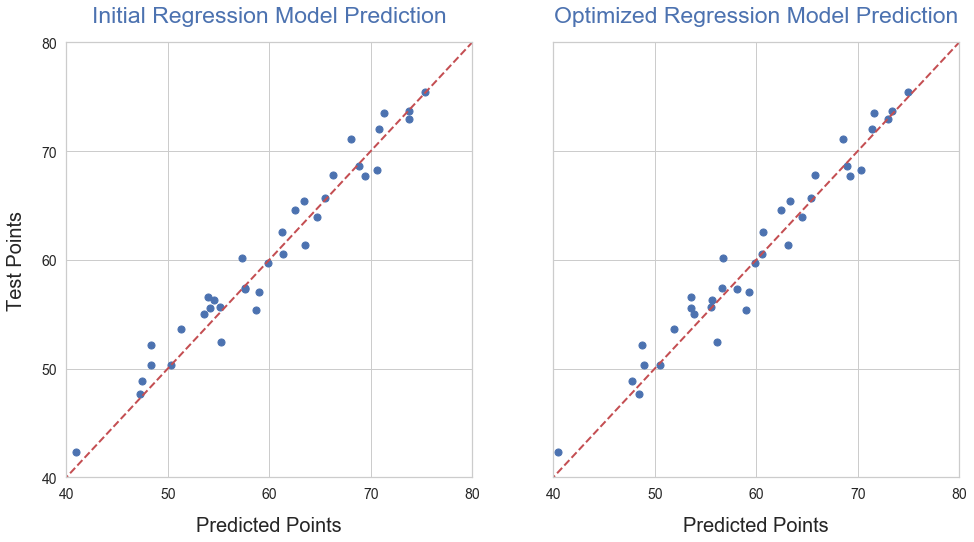

In [58]:
# Compare predictions from Initial and Optimized model to test points, y_test

# Create data points for a straight line representing a perfect fit to the y_test data points 
y_line = np.arange(int(y_test.min()) - 10, int(y_test.max()) + 10)

# set axes limits - adjust if necessary
x_min = 40
x_max = 80
d_x = 10

y_min = 40
y_max = 80
d_y = 10

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(16,8))

# Initial Model
axes[0].scatter(y_pred_1, y_test, s = 50, c = 'b')
axes[0].plot(y_line, y_line, 'r--', lw = 2)
axes[0].set_title('Initial Regression Model Prediction', fontsize = 23, c = 'b', pad = 20)
axes[0].set_xlabel('Predicted Points', fontsize = 20, labelpad = 15)
axes[0].set_ylabel('Test Points', fontsize = 20, labelpad = 15)
axes[0].set_xlim(x_min, x_max)
axes[0].set_xticks(np.arange(x_min, x_max + d_x, d_x))
axes[0].set_ylim(y_min, y_max)
axes[0].set_yticks(np.arange(y_min, y_max + d_y, d_y))
axes[0].tick_params(labelsize = 14)


# Optimized Model
axes[1].scatter(y_pred_2, y_test, s = 50, c = 'b')
axes[1].plot(y_line, y_line, 'r--', lw = 2)
axes[1].set_title('Optimized Regression Model Prediction', fontsize = 23, c = 'b', pad = 20)
axes[1].set_xlabel('Predicted Points', fontsize = 20, labelpad = 15)
axes[1].set_xlim(x_min, x_max)
axes[1].set_xticks(np.arange(x_min, x_max + d_x, d_x))
axes[1].set_ylim(y_min, y_max)
axes[1].set_yticks(np.arange(y_min, y_max + d_y, d_y))
axes[1].tick_params(labelsize = 14)

plt.show()

In [59]:
# It is difficult to visually discern significant differences between the two scatter plots
# That's why we will plot the distributions of the residuals for each model
    # word of caution: the number of observations here is small - not a good case for comparison with normal distribution

In [60]:
# Get the residuals

# from Initial regression model
res_1 = y_test - y_pred_1

# from Optimized regression model
res_2 = y_test - y_pred_2

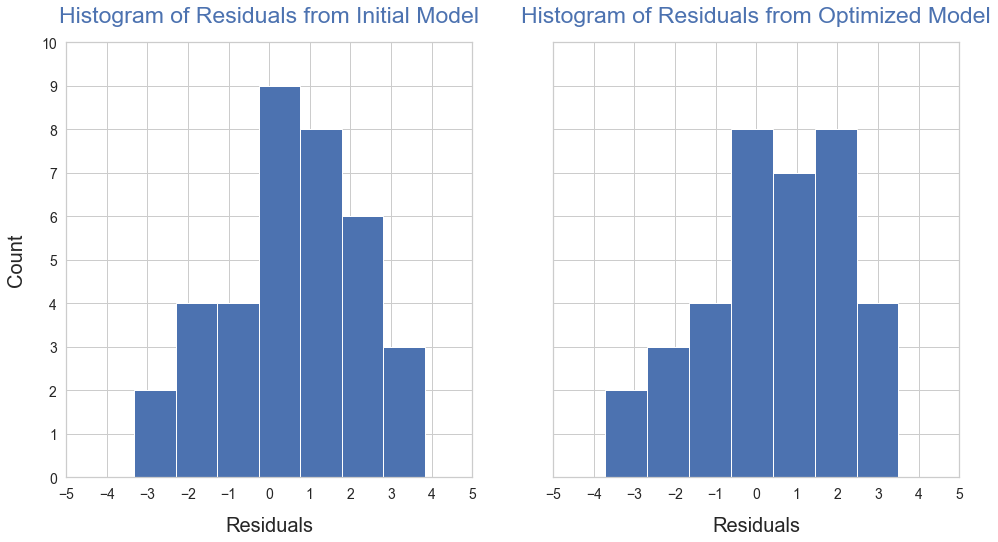

In [61]:
# Plot the histograms of the residuals --> use small number of bins because of the limited number of data points

# Set axes limits - adjust if necessary
x_min = -5
x_max = +5
d_x = 1

y_min = 0
y_max = 10
d_y = 1

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(16,8))

# Initial Model
axes[0].hist(res_1, bins = 7, color = 'b')
axes[0].set_title('Histogram of Residuals from Initial Model', fontsize = 23, c = 'b', pad = 20)
axes[0].set_xlabel('Residuals', fontsize = 20, labelpad = 15)
axes[0].set_ylabel('Count', fontsize = 20, labelpad = 15)
axes[0].set_xlim(x_min, x_max)
axes[0].set_xticks(np.arange(x_min, x_max + d_x, d_x))
axes[0].set_ylim(y_min, y_max)
axes[0].set_yticks(np.arange(y_min, y_max + d_y, d_y))
axes[0].tick_params(labelsize = 14)


# Optimized Model
axes[1].hist(res_2, bins = 7, color = 'b')
axes[1].set_title('Histogram of Residuals from Optimized Model', fontsize = 23, c = 'b', pad = 20)
axes[1].set_xlabel('Residuals', fontsize = 20, labelpad = 15)
axes[1].set_xlim(x_min, x_max)
axes[1].set_xticks(np.arange(x_min, x_max + d_x, d_x))
axes[1].set_ylim(y_min, y_max)
axes[1].set_yticks(np.arange(y_min, y_max + d_y, d_y))
axes[1].tick_params(labelsize = 14)

plt.show()

In [62]:
# Because of the small number of of observations the histograms are not very smooth
# It appears that both models slightly underestimate the target since there are more positive than negative residuals

In [63]:
# Print the means and the standard deviations (std) of the residuals

print("Mean of Residuals_1:", round(res_1.mean(),2))
print("std of Residuals_1:", round(res_1.std(),2))
print("\n")
print("Mean of Residuals_2:", round(res_2.mean(),2))
print("std of Residuals_2:", round(res_2.std(),2))

Mean of Residuals_1: 0.51
std of Residuals_1: 1.73


Mean of Residuals_2: 0.47
std of Residuals_2: 1.76


In [64]:
# The mean of the residuals of the Optimized model is slightly smaller than that of the Initial model
# Taking into account the improved Adjusted R2 score as well, the optimized model should be selected as the final model
# Note: for the magnitude of the target values, the mean and the std of the residuals are extremely small --> very accurate model

In [65]:
# This concludes our investigation of the new metrics introduced
# We find that:
    # 1) the new features do not show abnormal behavior
    # 2) most of these features play significant role in determining the overal ranking score
    # 3) from these feature using Multiple Linear Regression model one can predict with high accuracy the ranking score
# Thus, we can conclude that the new metrics introduced and the ranking based on it are sound